# **Diwali Sales Analysis Project**

### **Importing the Necessary Libraries**

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

### **Reading the Diwali Sales File**

In [215]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [216]:
# Checking the Number of Rows and Columns of the Dataset
df.shape

(11251, 15)

In [217]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [218]:
#Dropping unrelated/blank columns
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [219]:
#Checking the Dataset for Null Values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [220]:
df.shape

(11251, 13)

In [221]:
# Removing the Null Values
df.dropna(inplace = True)

In [222]:
# Removing the Duplicate Values
df = df.drop_duplicates()

In [223]:
# Checking for unique values in all the Columns
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
dtype: int64

In [224]:
# change data type(use astype for change data type)
df['Amount']=df['Amount'].astype('int')

In [225]:
df['Amount'].dtypes

dtype('int64')

In [226]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [227]:
#rename column
df.rename(columns = {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


## **Exploratory Data Analysis (EDA)**

#### **Based on Gender**

In [228]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

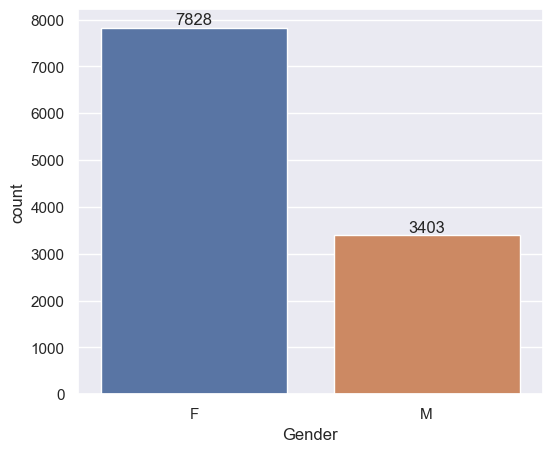

In [229]:
ax = sns.countplot(x = 'Gender',data = df, hue ='Gender')

for bars in ax.containers: #adding values
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

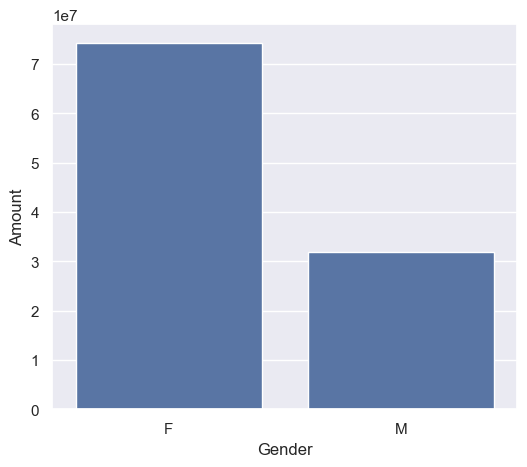

In [230]:
sales_gen = df.groupby(['Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y = 'Amount', data = sales_gen)

#### **From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.**

#### **Percentage of Sales by Gender**

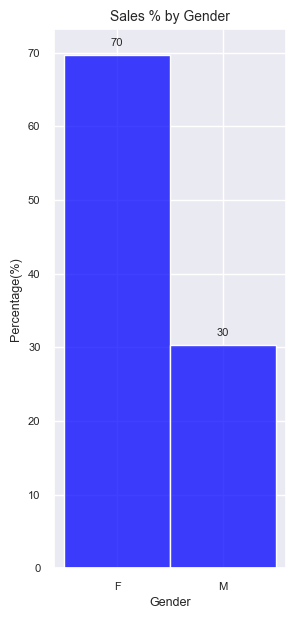

In [231]:
plt.figure(figsize = (3,7))
ax = sns.histplot(data = df['Gender'], bins = 3, stat = 'percent', color = 'blue')
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Gender', fontsize = 9)
plt.ylabel('Percentage(%)', fontsize = 9)
plt.title('Sales % by Gender', fontsize = 10)

plt.show()

#### **From above analysis we can see that most of the buyers are females(70%)and even the purchasing power of females are greater than man**

### **Based on Age**

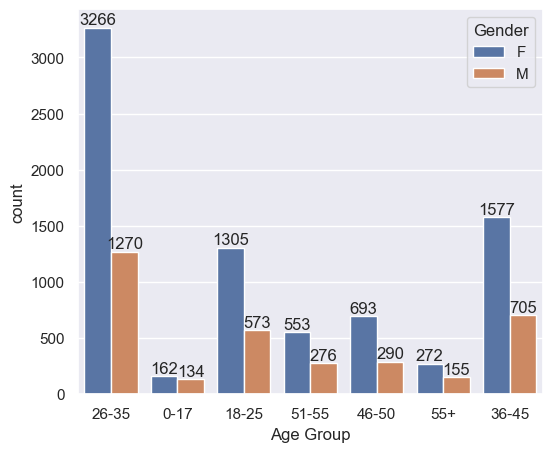

In [232]:
ax = sns.countplot (data = df, x= 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

#### **Total Sales by Age Group**

In [233]:
df_age2 = df.groupby(['Age Group'])[['Amount']].sum().reset_index()
df_age2

,Age Group,Amount
0,0-17,2699653
1,18-25,17235530
2,26-35,42581767
3,36-45,22135135
4,46-50,9207844
5,51-55,8237909
6,55+,4080987


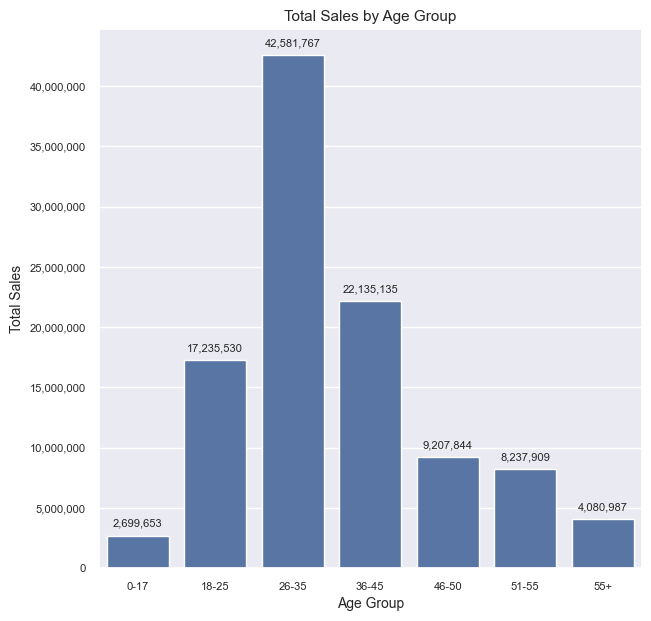

In [234]:
# Total Sales by Age Group Barplot

plt.figure(figsize = (7,7))

ax = sns.barplot(x = 'Age Group', y = 'Amount',  data = df_age2)
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Age Group', fontsize = 10)
plt.ylabel('Total Sales', fontsize = 10)
plt.title('Total Sales by Age Group', fontsize = 11)

plt.show()

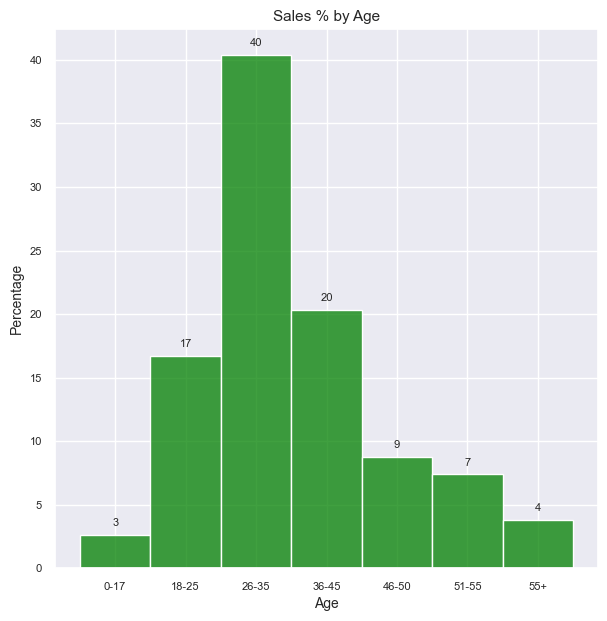

In [235]:
# Percentage of Sales by Age

ndf = df['Age Group'].sort_values(ascending = True)

plt.figure(figsize = (7,7))

ax = sns.histplot(data = ndf, bins = 20, color = 'Green', stat = 'percent')
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Percentage', fontsize = 10)
plt.title('Sales % by Age', fontsize = 11)

plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

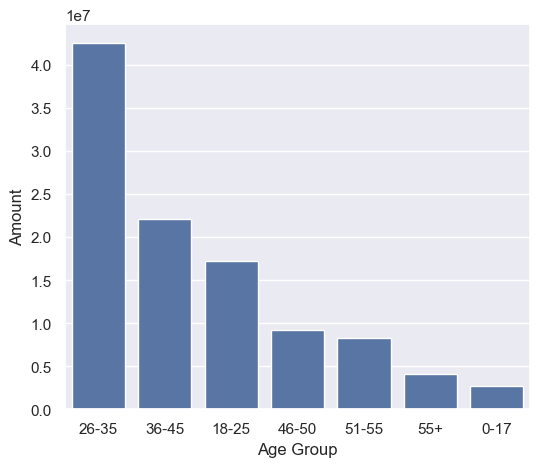

In [236]:
# Total Amount VS Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x = 'Age Group',y= 'Amount',data = sales_age)


#### **From above graphs we can see that most of the buyers are of age group between 23-35 yrs female**

### **Based on Location (State)**

<Axes: xlabel='State', ylabel='Orders'>

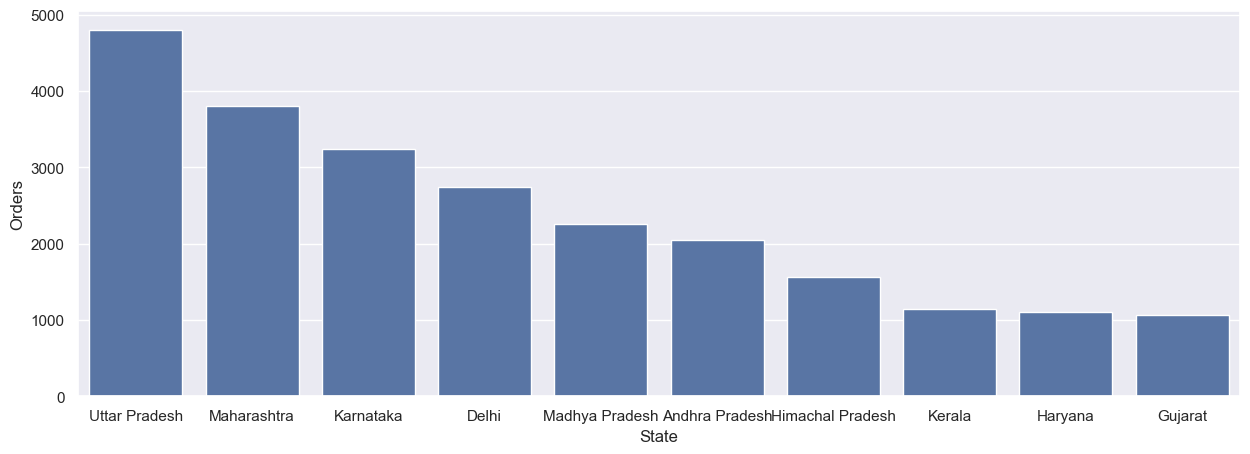

In [237]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state , x= 'State',y='Orders')

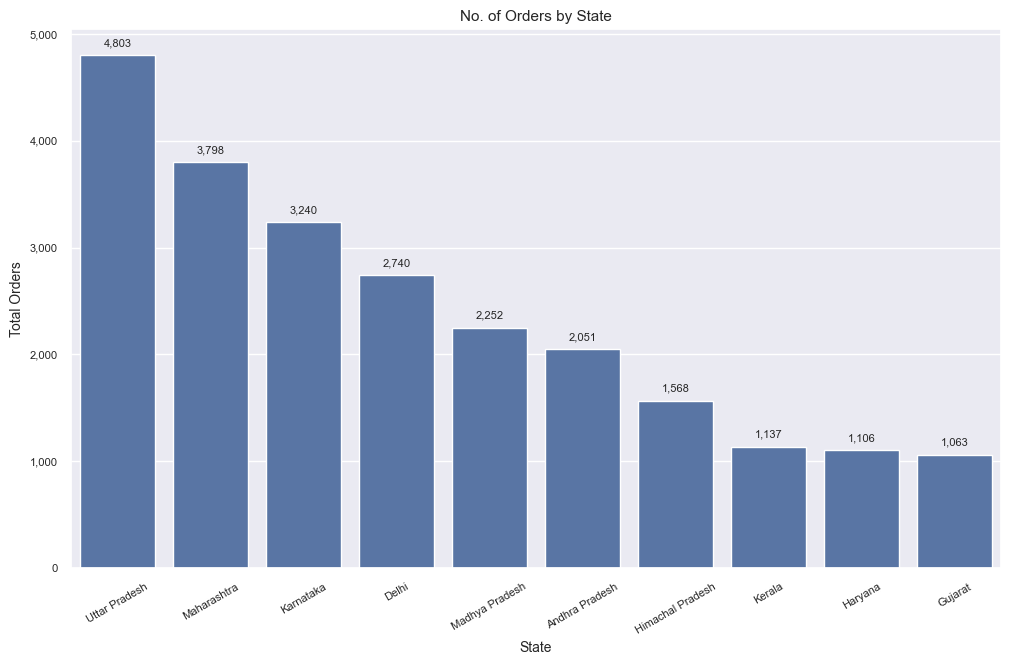

In [238]:
# Total Orders from Top 10 States Barplot
plt.figure(figsize = (12,7))

ax = sns.barplot(x = 'State', y = 'Orders', data = sales_state)
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(fontsize = 8, rotation = 30)
plt.yticks(fontsize = 8)
plt.xlabel('State', fontsize = 10)
plt.ylabel('Total Orders', fontsize = 10)
plt.title('No. of Orders by State', fontsize = 11)

plt.show()

<Axes: xlabel='State', ylabel='Amount'>

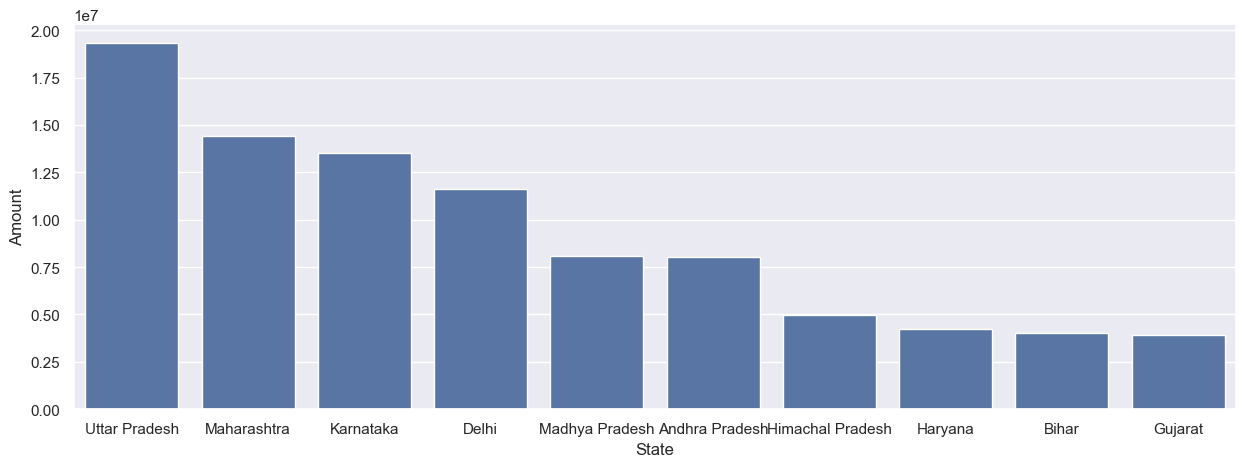

In [239]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state , x= 'State',y='Amount')

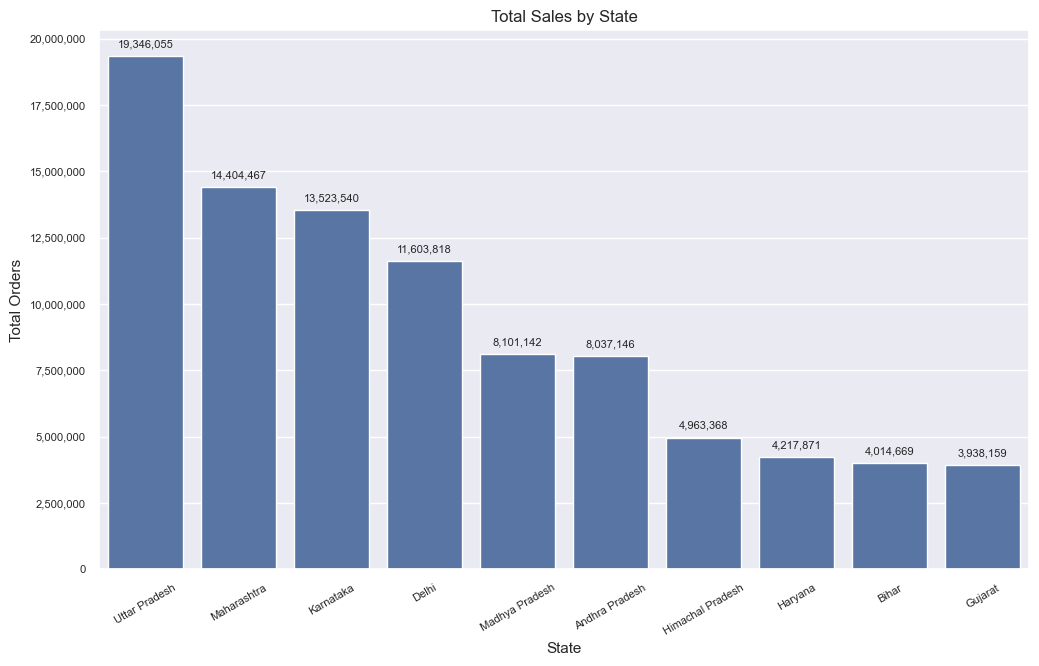

In [240]:
# Sales from top 10 States Barplot
plt.figure(figsize = (12,7))

ax = sns.barplot(x = 'State', y = 'Amount', data = sales_state)
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(fontsize = 8, rotation = 30)
plt.yticks(fontsize = 8)
plt.xlabel('State', fontsize = 11)
plt.ylabel('Total Orders', fontsize = 11)
plt.title('Total Sales by State', fontsize = 12)

plt.show()



#### **From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively**

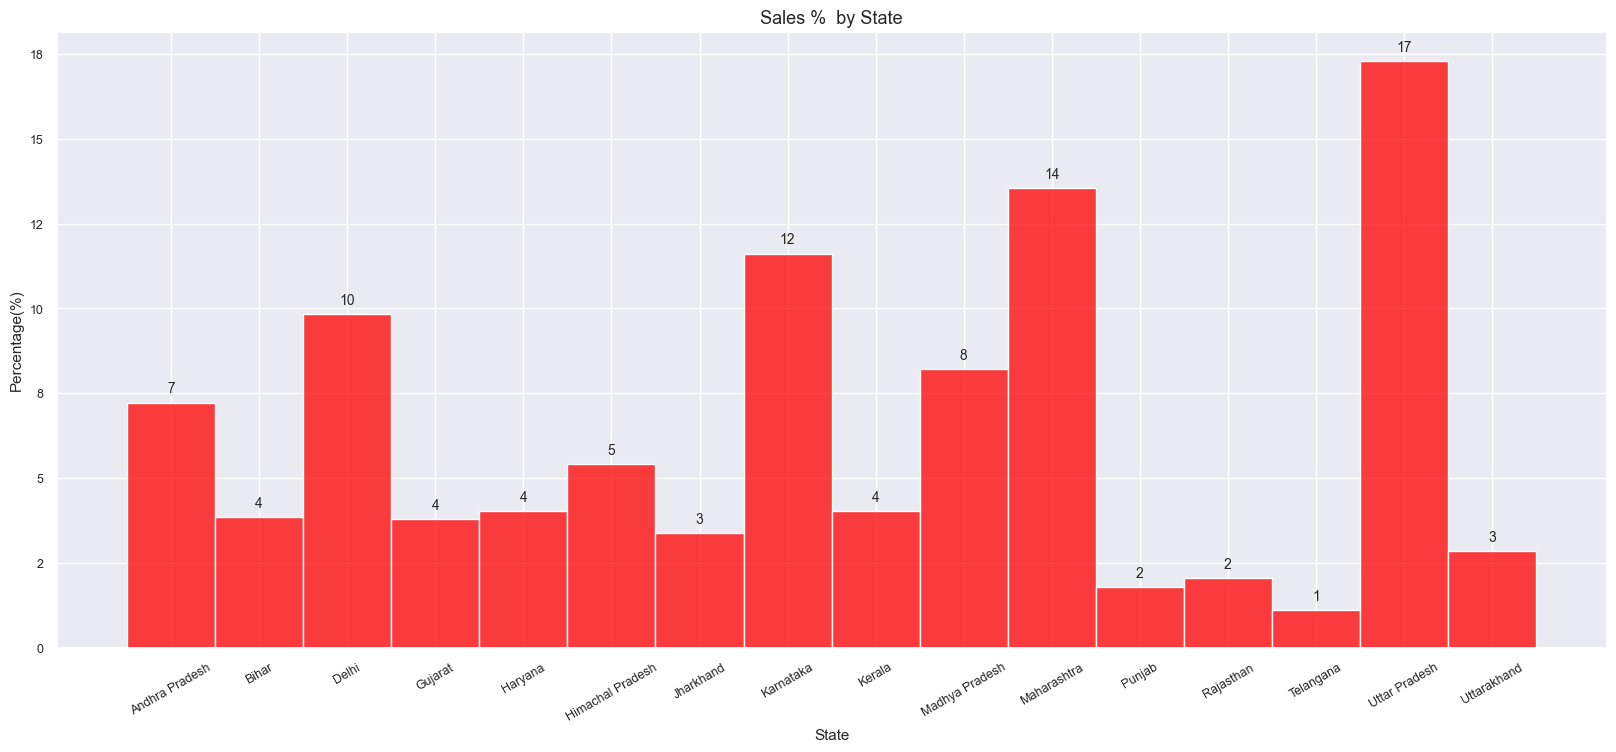

In [241]:
# Percentage of Sales by State
ndf = df['State'].sort_values(ascending = True)
plt.figure(figsize = (20,8))

ax = sns.histplot(data = ndf, bins = 30,color ='red',stat = 'percent')
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 10, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(fontsize = 9, rotation = 30)
plt.yticks(fontsize = 9)
plt.xlabel('State', fontsize = 11)
plt.ylabel('Percentage(%)', fontsize = 11)
plt.title('Sales %  by State', fontsize = 13)

plt.show()

#### **From above analysis we can see that the top 3 states Uttar Pradesh(17.3%), Maharashtra(13.6%), Karnatka(11.6%)respectively accounted for 42.5% of the total sales.**

#### **Based on Marital Status**

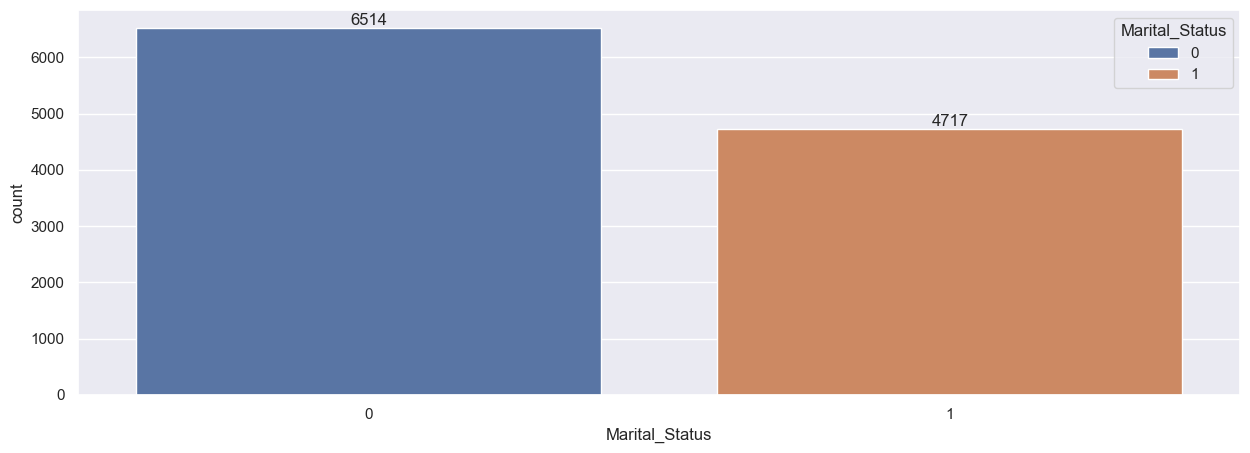

In [242]:
ax = sns.countplot(data=df, x = 'Marital_Status', hue = 'Marital_Status')
sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

TypeError: xticks() takes from 0 to 2 positional arguments but 3 were given

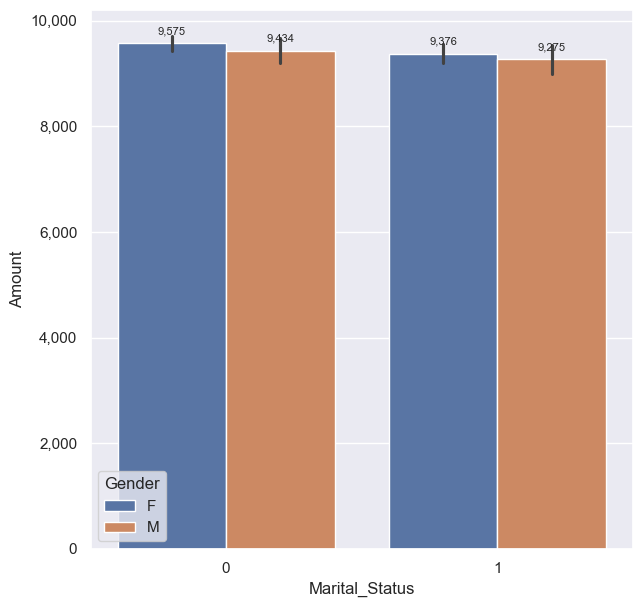

In [243]:
# Sales on the Basis of Marital Status Barplot

plt.figure(figsize = (7,7))

ax = sns.barplot(x = 'Marital_Status', y = 'Amount',hue = 'Gender', data = df)
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.bar_label(ax.containers[1], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks([0,1],['Non-Married'],['Married'],fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Marital Status', fontsize = 11)
plt.ylabel('Total Sales', fontsize = 11)
plt.legend(title = 'Gender', fontsize = 9)
plt.title('Total Sales by Marital Status', fontsize = 12)

plt.show()


<Axes: xlabel='Marital_Status', ylabel='Amount'>

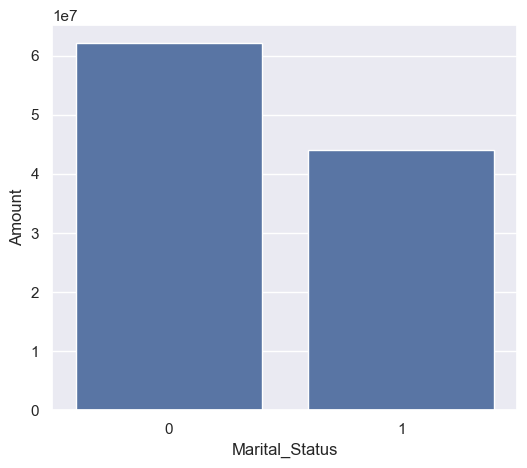

In [ ]:
sales_state = df.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state , x= 'Marital_Status',y='Amount')

#### **From above graphs we can see that most of the buyers are married(women)and they have high purchasing power**

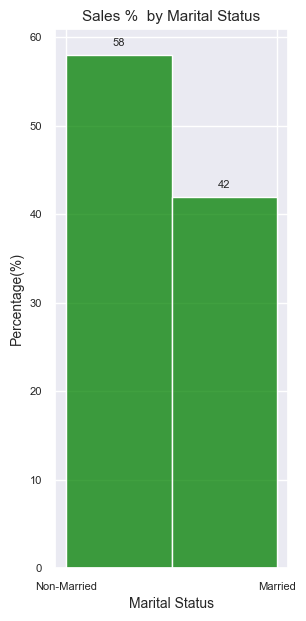

In [ ]:
# Percentage of Sales by Marital Status

plt.figure(figsize = (3,7))

ax = sns.histplot(data = df['Marital_Status'], bins = 2,color ='green',stat = 'percent')
ax.bar_label(ax.containers[0], fmt = '{:,.0f}', fontsize = 8, label_type= 'edge', padding = 5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks([0,1],['Non-Married','Married'],fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Marital Status', fontsize = 10)
plt.ylabel('Percentage(%)', fontsize = 10)
plt.title('Sales %  by Marital Status', fontsize = 11)

plt.show()

#### **From above analysis we can see that 58% of buyers are non-married and amongst those, women have contributed 2.38 times more than man.**

#### **Based on Occupation**

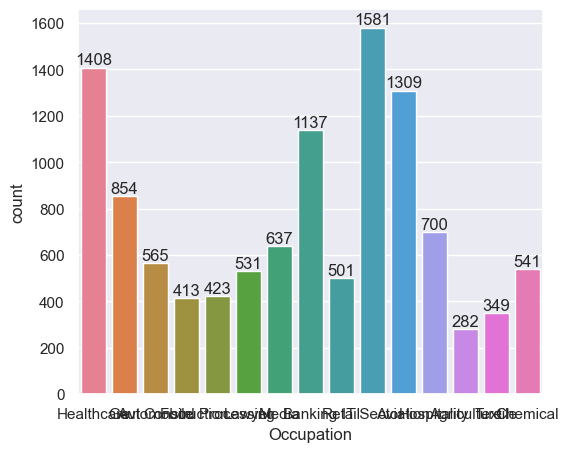

In [ ]:
ax = sns.countplot(data=df, x = 'Occupation', hue = 'Occupation')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

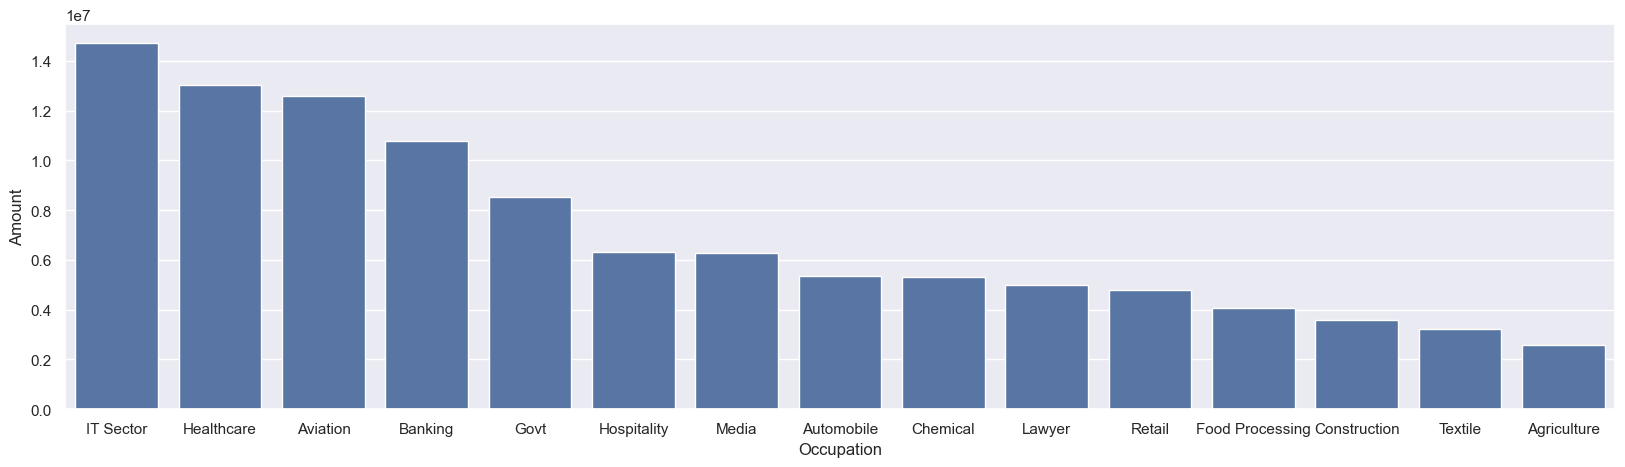

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state , x= 'Occupation',y='Amount')

#### **From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

#### **Product Category**

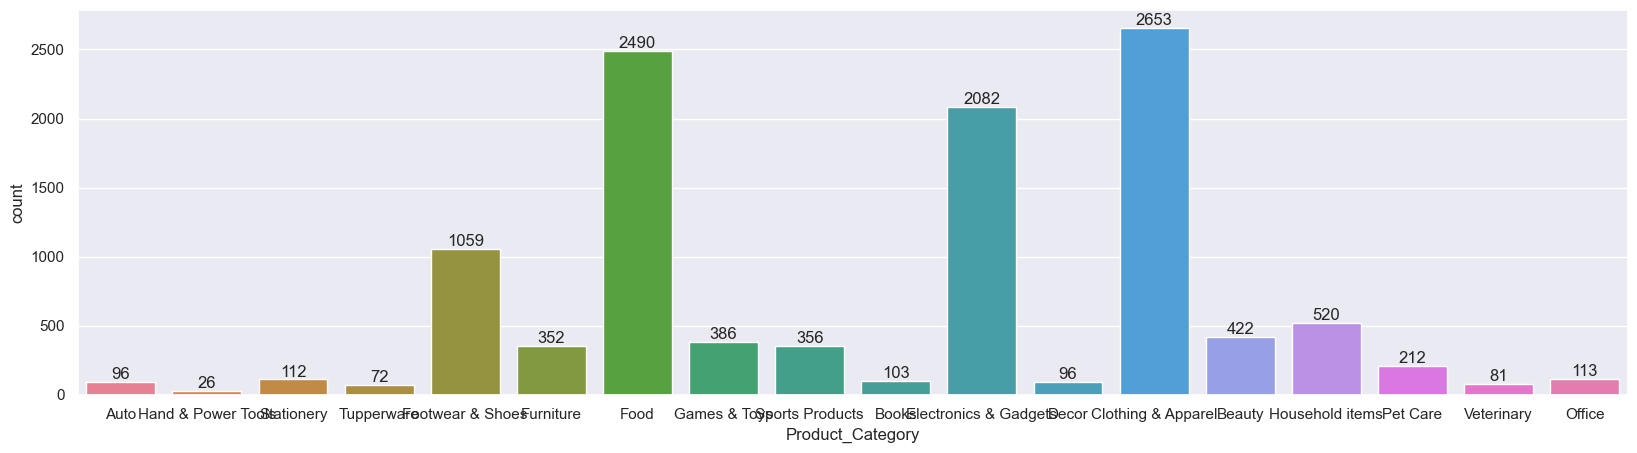

In [ ]:
ax = sns.countplot(data=df, x = 'Product_Category', hue = 'Product_Category')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

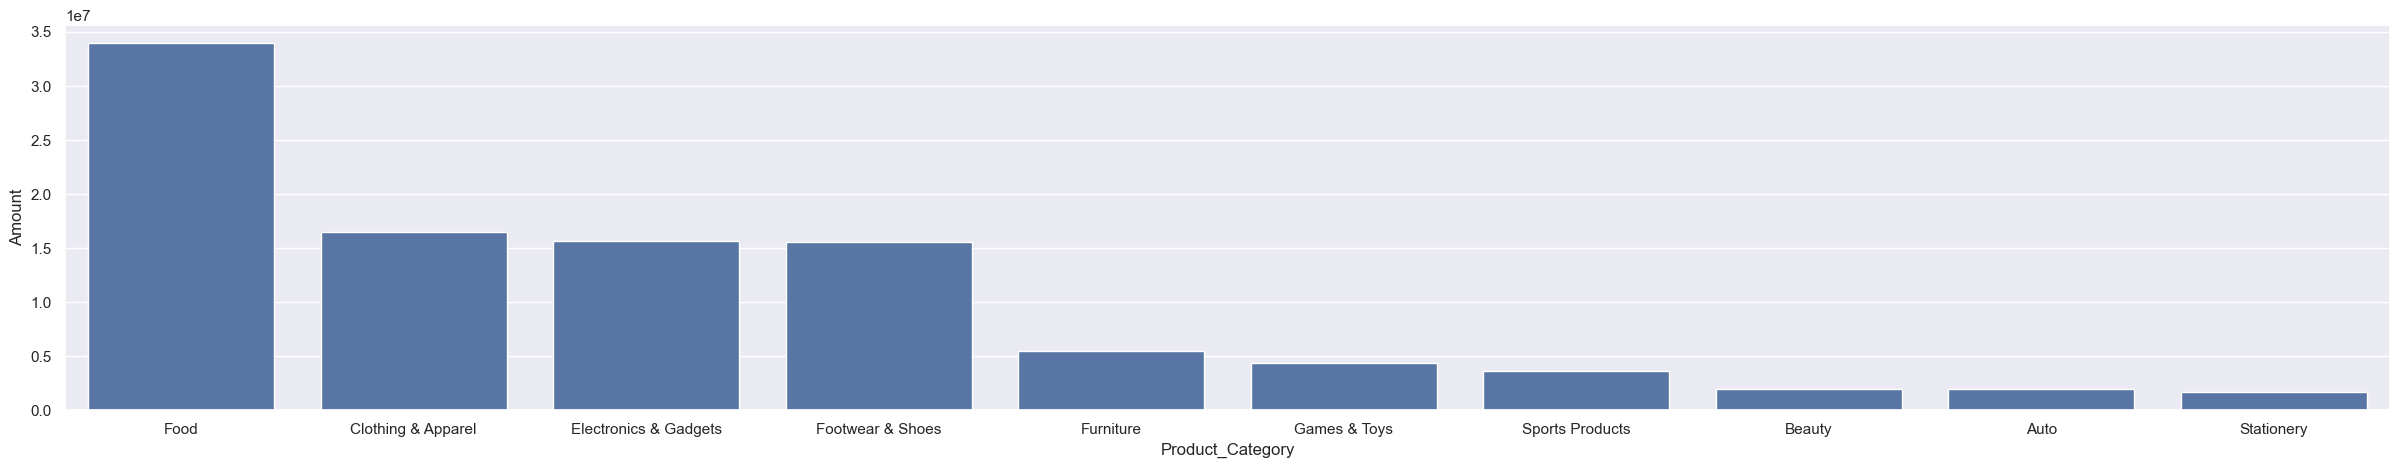

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data = sales_state , x= 'Product_Category',y='Amount')

#### **From above graphs we can see that most of the sold products are from Food, Clothing and Electronic category**

<Axes: xlabel='Product_ID', ylabel='Orders'>

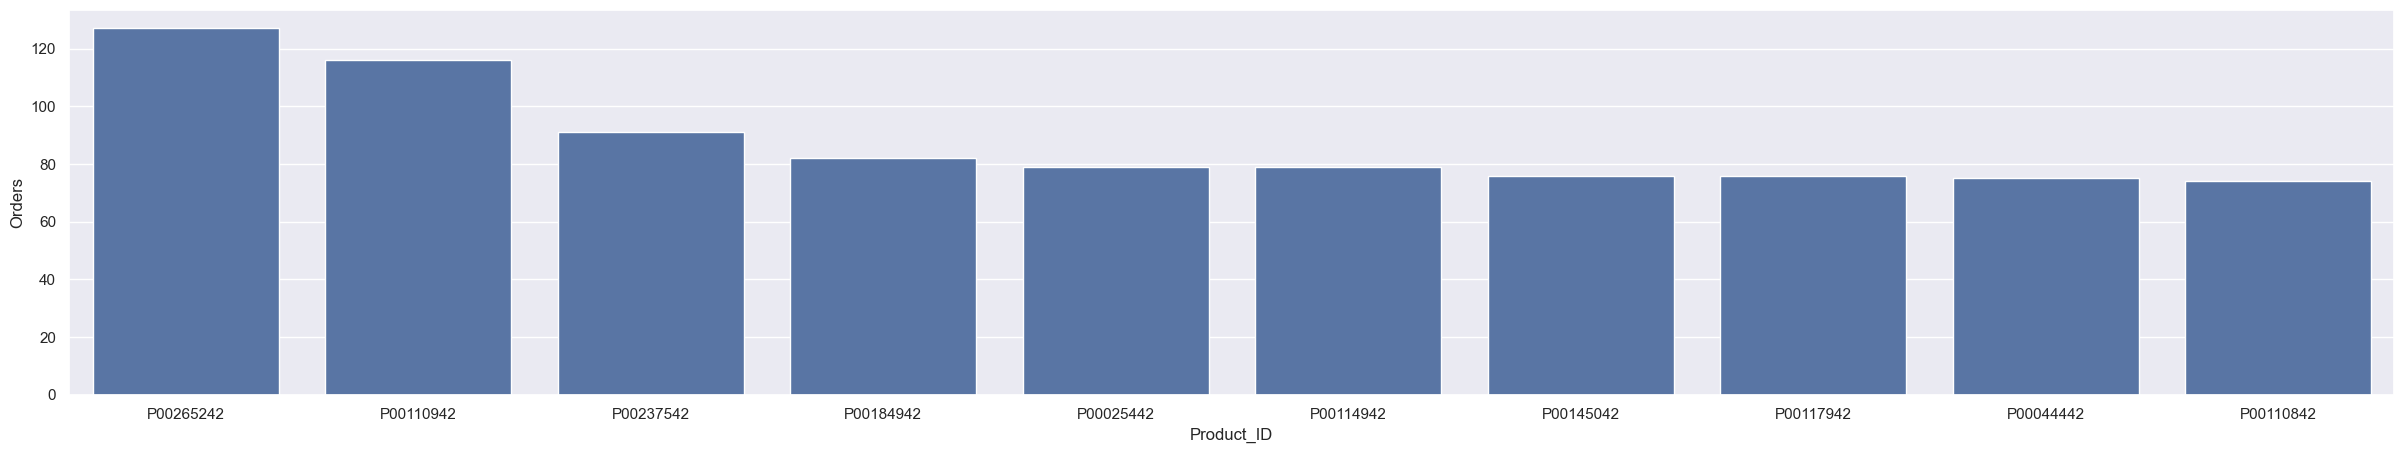

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data = sales_state , x= 'Product_ID',y='Orders')

<Axes: xlabel='Product_ID'>

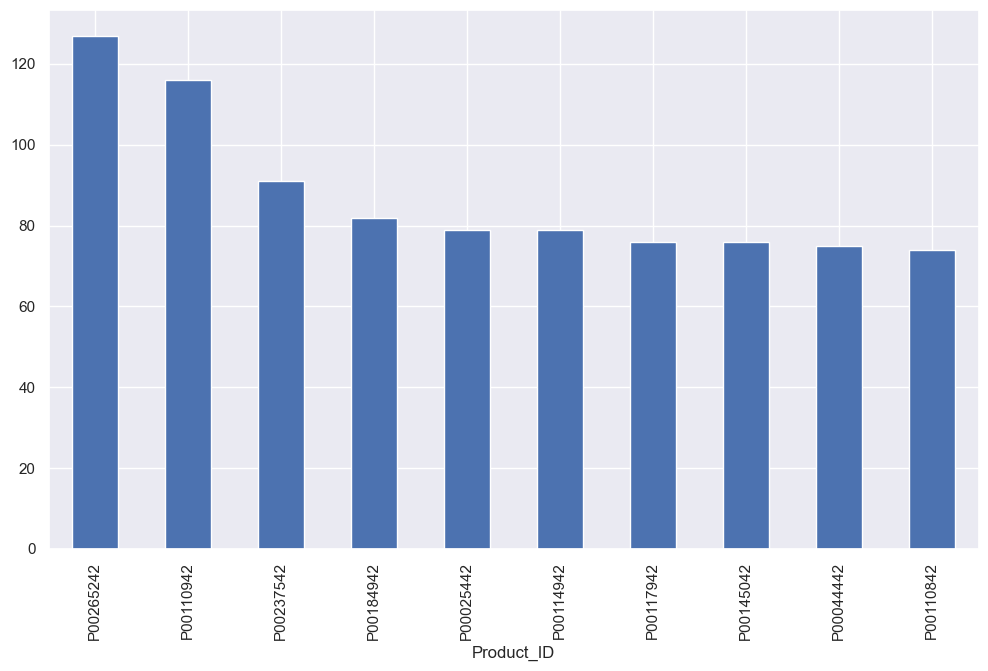

In [ ]:
# Top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## **Conclusion**
#### **Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely buy products from food,Clothing and Electronic category.**

## **Project Learnings**
- performed data cleaning and manipulation
- Performed exploratory data analysis(EDA) using pandas,matplotlib and seaborn libraries
- Improved customer experience by identifying potential customers across different states, occupation, gender and age groups
- Improved sales by identifying most selling product categories and products, which can help to plan inventory and hence meet the demands